In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, join
from glob import glob

plt.rcParams['figure.figsize'] = (12, 6)

# Deep catalogs

TU inputs:

1. EUC-GALCAT-2020-01-14_HPIX_5_NEST_2740.fits
2. EUC_SIM_STAR-CAT reorganized, took HealPix 2740

Added Subaru IB to both as:

Generated MER-like catalog as:

```bash
PhzMockMerFromTu --depth wide --size 250000 EUC-GALCAT-2020-01-14_HPIX_5_NEST_2740.fits MOCK_MER_WIDE_GAL_2740.fits
PhzMockMerFromTu --depth wide 2740.fits --size 10000 --overwrite MOCK_MER_WIDE_STAR_2740.fits
```

Note: 10000 stars is roughly the same proportion from `2740.fits` as 250000 is from `EUC-GALCAT-2020-01-14_HPIX_5_NEST_2740.fits`

Joined both using Topcat

Output:

1. MOCK_MER_WIDE_2740.fits

In [2]:
wide = Table.read('/home/aalvarez/Work/Data/SC8/TU/MOCK_MER_WIDE_2740.fits')
print('Galaxies\t', wide['GALAXY'].sum())
print('Stars   \t', (wide['GALAXY']==0).sum())
print('Total   \t', len(wide))

Galaxies	 250000
Stars   	 10000
Total   	 260000


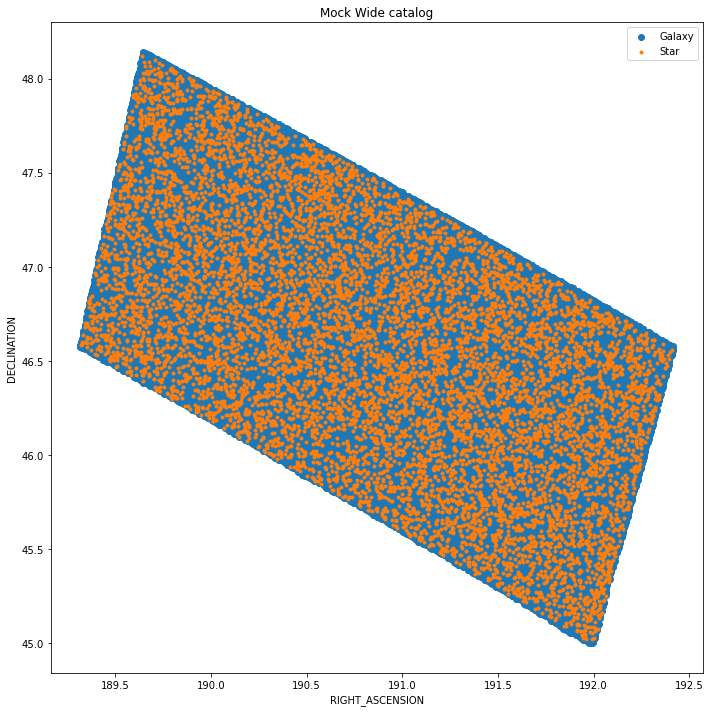

In [3]:
gal = wide['GALAXY'] == 1

plt.figure(figsize=(10, 10))
plt.scatter(wide['RIGHT_ASCENSION'][gal], wide['DECLINATION'][gal], marker='o', label='Galaxy')
plt.scatter(wide['RIGHT_ASCENSION'][~gal], wide['DECLINATION'][~gal], marker='.', label='Star')
plt.xlabel('RIGHT_ASCENSION')
plt.ylabel('DECLINATION')
plt.legend()
plt.title('Mock Wide catalog')
plt.tight_layout()

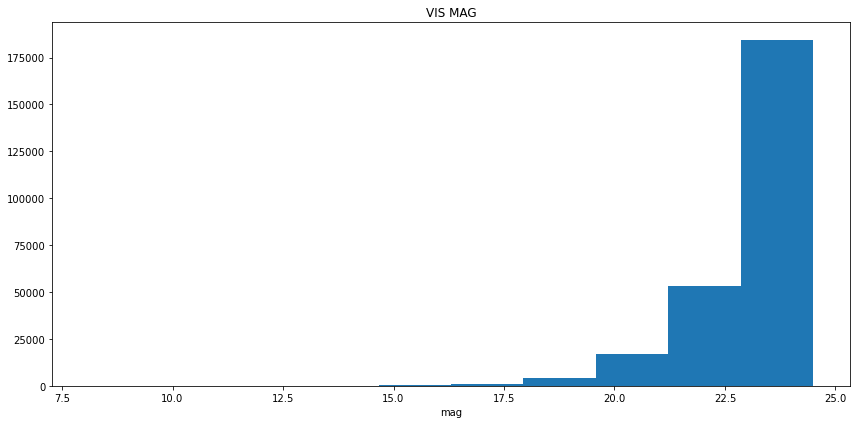

In [4]:
plt.figure()
plt.hist(wide['MAG_VIS_APER'], histtype='bar', stacked=True)
plt.title('VIS MAG')
plt.xlabel(str(wide['MAG_VIS_APER'].unit))
plt.tight_layout()

In [5]:
fluxes = [c.split('_', 1)[1] for c in wide.colnames if c.startswith('FLUX_')]

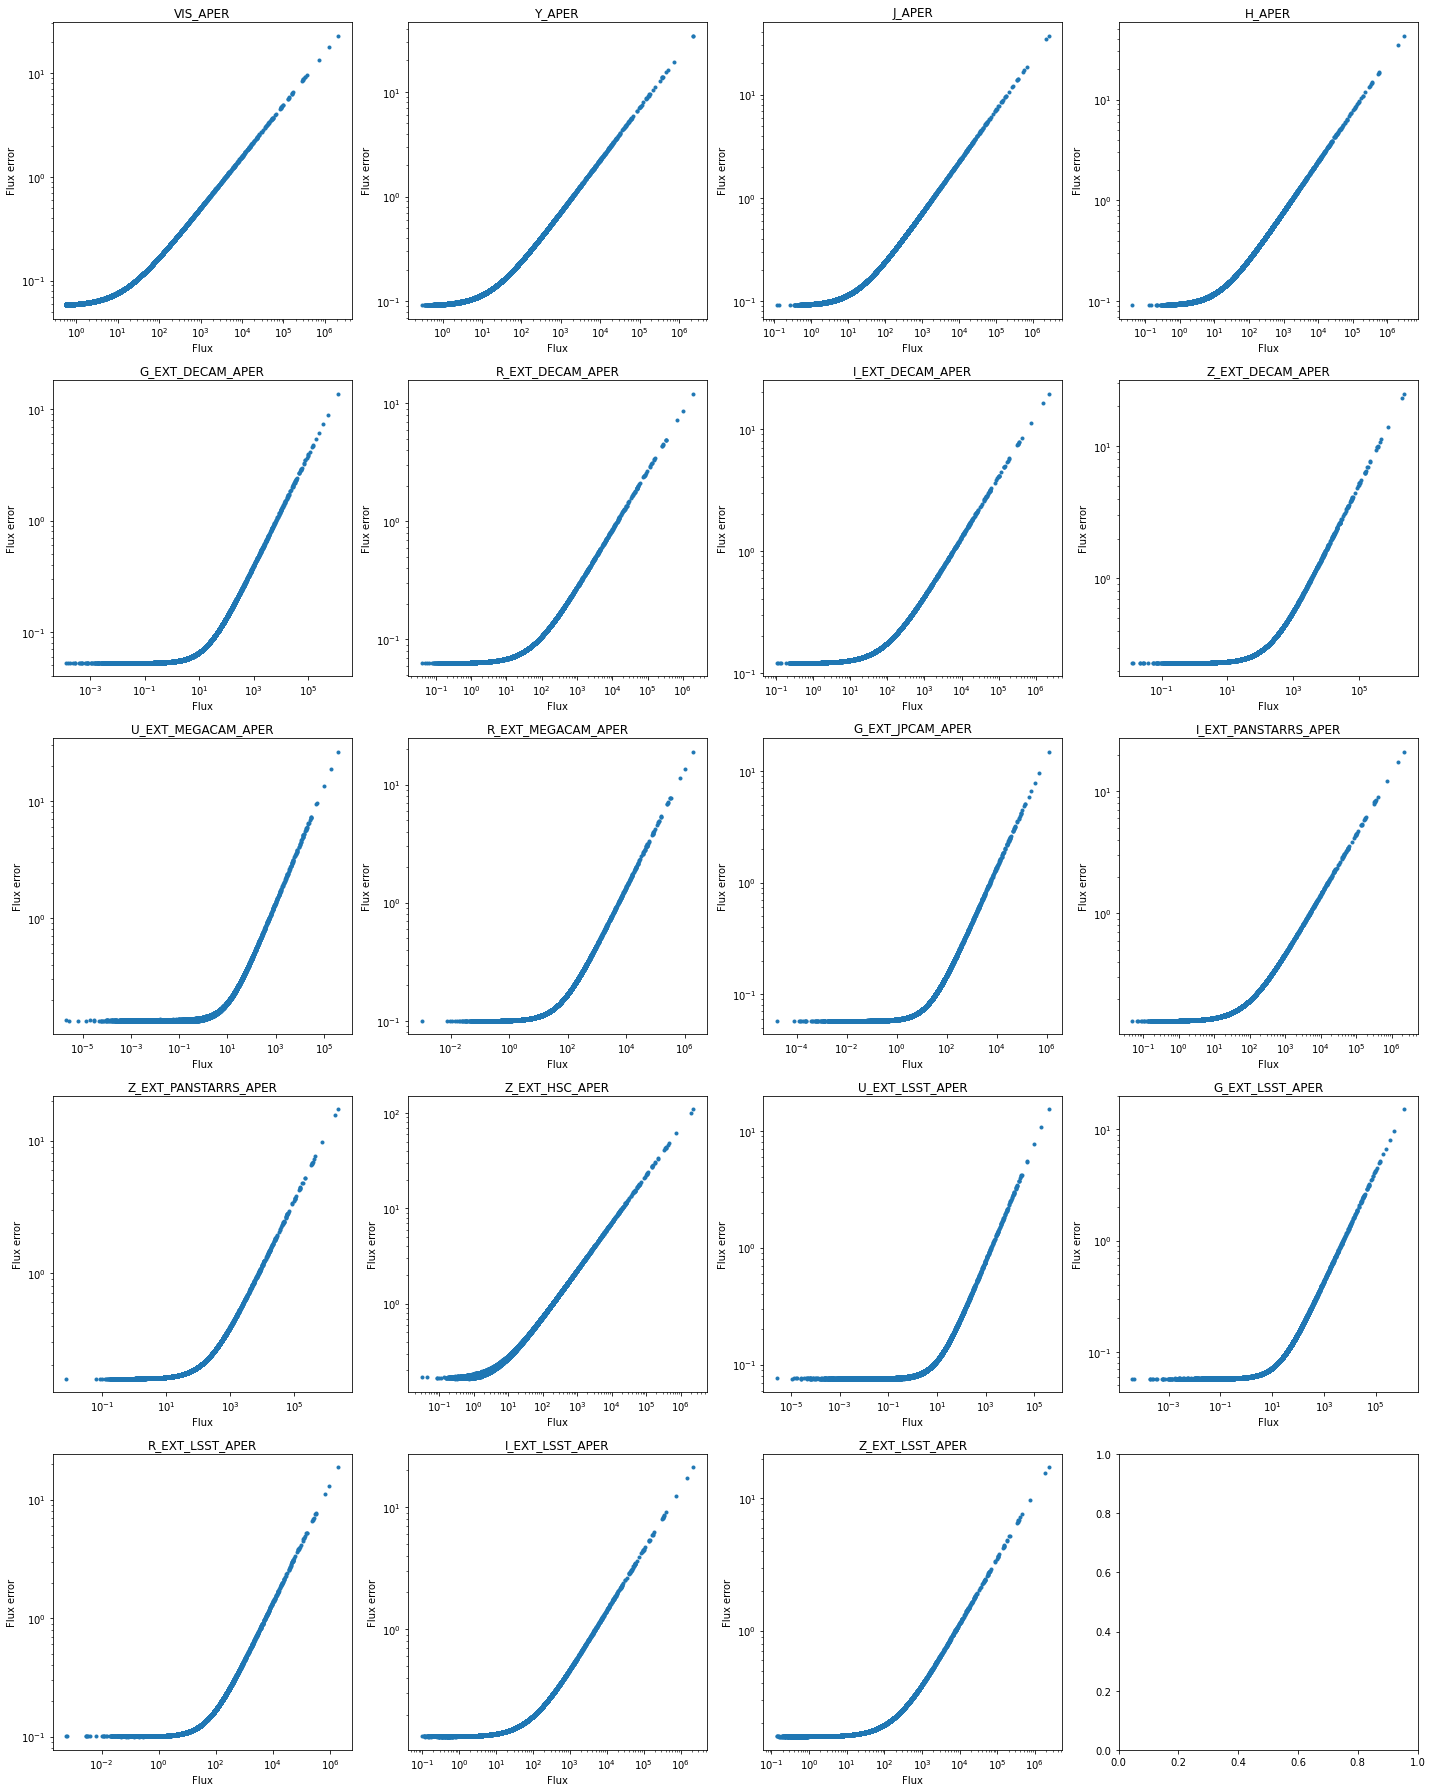

In [6]:
ncols = 4
nrows = len(fluxes) // ncols + (len(fluxes) % ncols > 0) 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))

for flux, ax in zip(fluxes, axes.ravel()):
    ax.set_title(flux)
    ax.plot(wide['FLUX_' + flux], wide['FLUXERR_' + flux], '.')
    ax.set_xlabel('Flux')
    ax.set_ylabel('Flux error')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
plt.tight_layout()

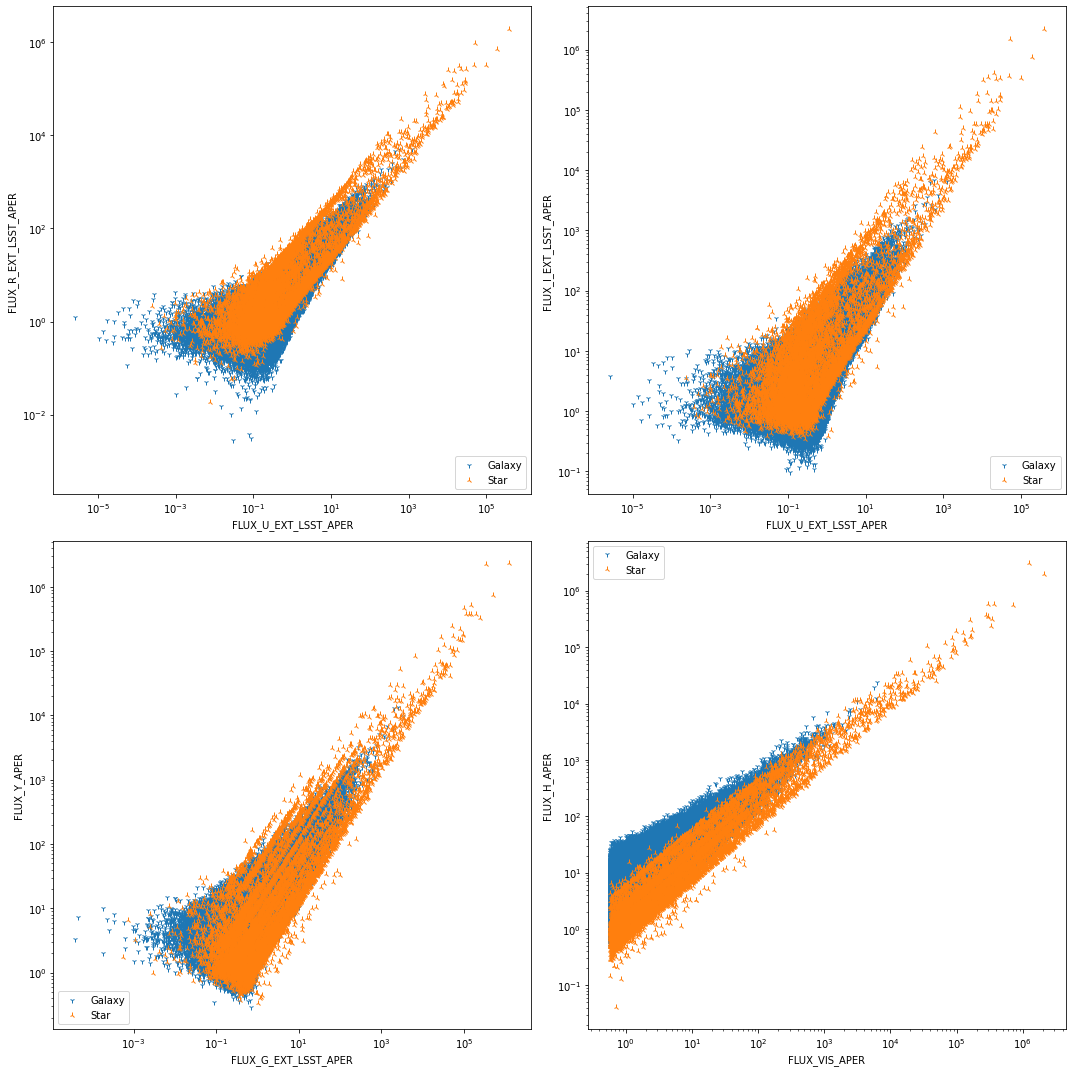

In [7]:
colors = [
    ('FLUX_U_EXT_LSST_APER', 'FLUX_R_EXT_LSST_APER'),
    ('FLUX_U_EXT_LSST_APER', 'FLUX_I_EXT_LSST_APER'),
    ('FLUX_G_EXT_LSST_APER', 'FLUX_Y_APER'),
    ('FLUX_VIS_APER', 'FLUX_H_APER'),
]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
for (a, b), ax in zip(colors, axes.ravel()):
    ax.plot(wide[a][gal], wide[b][gal], '1', label='Galaxy')
    ax.plot(wide[a][~gal], wide[b][~gal], '2', label='Star')
    ax.set_xlabel(a)
    ax.set_ylabel(b)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
plt.tight_layout()